# 🫀 Heart Disease Prediction - Advanced Notebook
This notebook covers data preprocessing, exploratory data analysis (EDA), model training using Logistic Regression and Decision Tree, and evaluation using ROC AUC and confusion matrix.

In [20]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

In [21]:
# 2. Load dataset
df = pd.read_csv("D:\Developershub\heart_cleveland_upload.csv")  # Ensure the file is in the same directory
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [22]:
# 3. Basic exploration
print("Dataset Shape:", df.shape)
print(df.info())
df.describe()

Dataset Shape: (297, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [23]:
# 4. Check for missing values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [24]:
print(df.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')


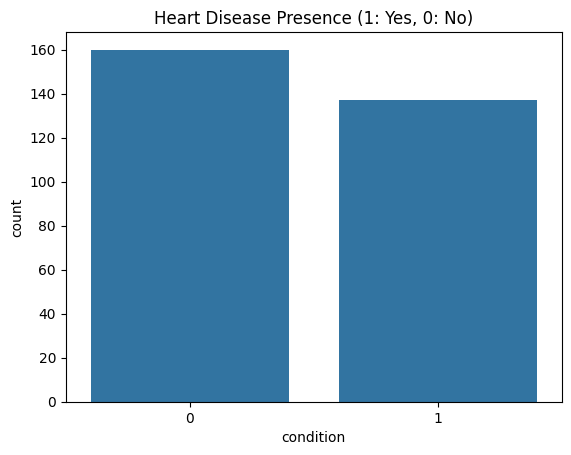

In [25]:
# 5. EDA: target distribution
sns.countplot(data=df, x='condition')
plt.title("Heart Disease Presence (1: Yes, 0: No)")
plt.show()

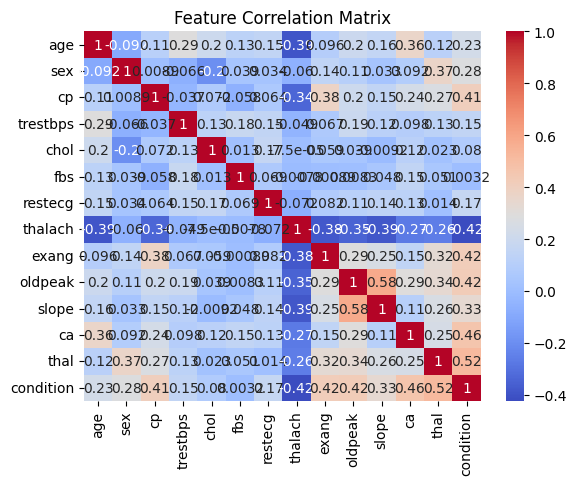

In [26]:
# 6. Correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

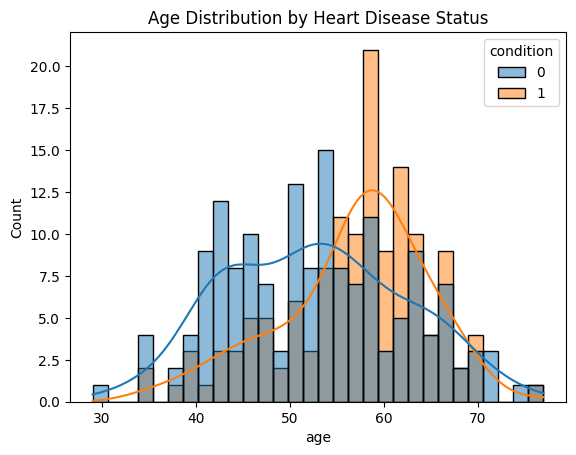

In [27]:
# 7. Age vs Target
sns.histplot(data=df, x='age', hue='condition', kde=True, bins=30)
plt.title("Age Distribution by Heart Disease Status")
plt.show()

In [28]:
# 8. Feature selection
X = df.drop('condition', axis=1)
y = df['condition']

In [29]:
# 9. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# 10. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
# 11. Model training
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [32]:
# 12. Predictions
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

In [33]:
# 13. Evaluation function
def evaluate_model(model_name, y_true, y_pred, model_probabilities):
    print(f"\n--- {model_name} Evaluation ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, model_probabilities))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    fpr, tpr, _ = roc_curve(y_true, model_probabilities)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_true, model_probabilities):.2f})")


--- Logistic Regression Evaluation ---
Accuracy: 0.9166666666666666
ROC AUC: 0.953125
Confusion Matrix:
 [[32  0]
 [ 5 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60


--- Decision Tree Evaluation ---
Accuracy: 0.7833333333333333
ROC AUC: 0.8705357142857143
Confusion Matrix:
 [[26  6]
 [ 7 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        32
           1       0.78      0.75      0.76        28

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



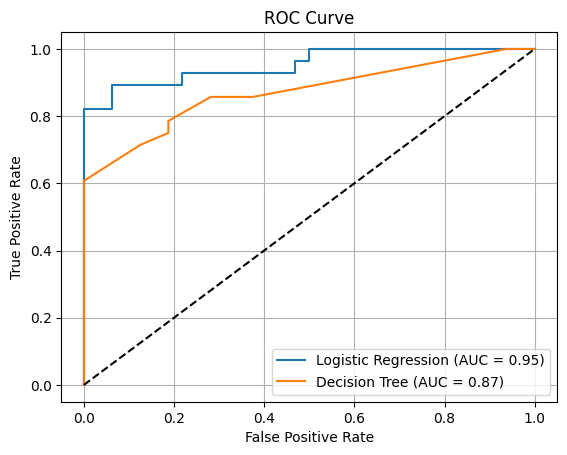

In [34]:
# 14. Evaluate both models
y_prob_log = log_model.predict_proba(X_test)[:, 1]
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)

y_prob_tree = tree_model.predict_proba(X_test)[:, 1]
evaluate_model("Decision Tree", y_test, y_pred_tree, y_prob_tree)

# Plot ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

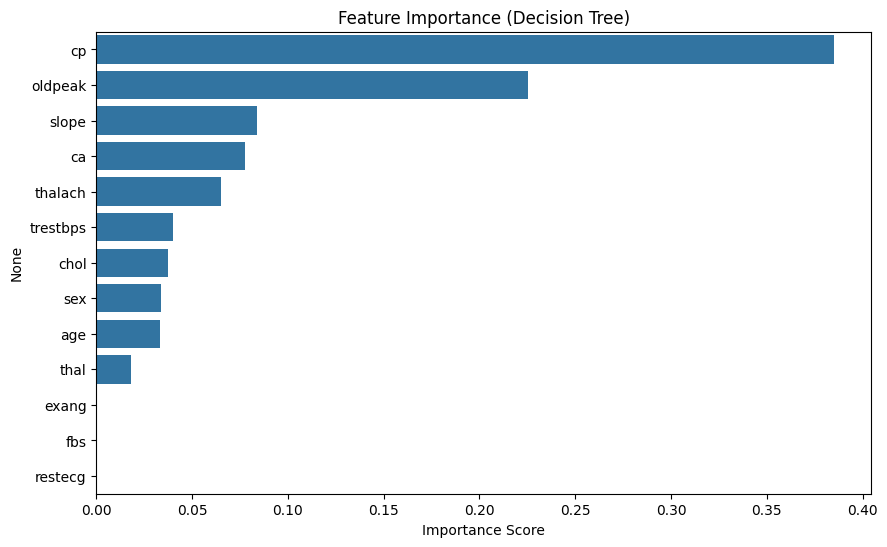

In [35]:
# 15. Feature importance
feat_imp = pd.Series(tree_model.feature_importances_, index=X.columns)
feat_imp = feat_imp.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.show()